# Rebuild brats 2d dataset - without empty slices

In [1]:
import pickle
import numpy as np
import pylab as plt
plt.style.use('dark_background')
import h5py
from tqdm import tqdm

In [2]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_h5/val.h5', 'r')
hfn = h5py.File('/home/a_razumov/small_datasets/brats_seg_h5/val.h5', 'w')

In [3]:
with open('brats_train.cache', 'rb') as f:
    train_slices_cache = pickle.load(f)
with open('brats_val.cache', 'rb') as f:
    val_slices_cache = pickle.load(f)

In [11]:
key, idx = val_slices_cache[0]
img = hf[key][:-1,:,:,idx]
mask = hf[key][-1:,:,:,idx]
mask[mask==4] = 3

In [12]:
img.shape, mask.shape

((4, 240, 240), (1, 240, 240))

In [15]:
np.concatenate([img, mask], axis=0).shape

(5, 240, 240)

In [16]:
for i, (k, idx) in tqdm(enumerate(val_slices_cache), total=len(val_slices_cache)):
    img = hf[k][:-1,:,:,idx]
    mask = hf[k][-1:,:,:,idx]
    mask[mask==4] = 3
    hfn.create_dataset(name=str(i), data=np.concatenate([img, mask], axis=0))

100%|██████████| 15391/15391 [04:40<00:00, 54.80it/s]


In [17]:
hf.close()
hfn.close()

In [18]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_h5/train.h5', 'r')
hfn = h5py.File('/home/a_razumov/small_datasets/brats_seg_h5/train.h5', 'w')
for i, (k, idx) in tqdm(enumerate(train_slices_cache), total=len(train_slices_cache)):
    img = hf[k][:-1,:,:,idx]
    mask = hf[k][-1:,:,:,idx]
    mask[mask==4] = 3
    hfn.create_dataset(name=str(i), data=np.concatenate([img, mask], axis=0))

100%|██████████| 35508/35508 [10:49<00:00, 54.70it/s]


In [19]:
hf.close()
hfn.close()

In [2]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_seg_h5/train.h5')

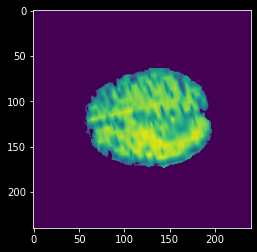

In [12]:
plt.imshow(hf['110'][0])
plt.show()

# Rebuild brats 3d dataset

In [1]:
import numpy as np
import pylab as plt
plt.style.use('dark_background')
import h5py
from tqdm import tqdm

In [2]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_h5/val.h5', 'r')
hfn = h5py.File('/home/a_razumov/small_datasets/brats_seg_h5/val_3d.h5', 'w')

In [6]:
for k in tqdm(hf.keys()):
    img = hf[k][:-1,:,:,:]
    mask = hf[k][-1:,:,:,:]
    mask[mask==4] = 3
    hfn.create_dataset(name=k, data=np.concatenate([img, mask], axis=0))

100%|██████████| 111/111 [01:10<00:00,  1.58it/s]


In [7]:
hf.close()
hfn.close()

In [9]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_h5/train.h5', 'r')
hfn = h5py.File('/home/a_razumov/small_datasets/brats_seg_h5/train_3d.h5', 'w')

for k in tqdm(hf.keys()):
    img = hf[k][:-1,:,:,:]
    mask = hf[k][-1:,:,:,:]
    mask[mask==4] = 3
    hfn.create_dataset(name=k, data=np.concatenate([img, mask], axis=0))

hf.close()
hfn.close()

100%|██████████| 258/258 [02:44<00:00,  1.57it/s]


# ACDC 3d dataset

In [1]:
import numpy as np
import pylab as plt
plt.style.use('dark_background')
import h5py
from tqdm import tqdm

In [2]:
hf = h5py.File('/home/a_razumov/small_datasets/acdc_seg_h5/val_3d.h5', 'r')

In [6]:
hf['patient015'].keys()

<KeysViewHDF5 ['0', '1']>